# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [12]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [14]:
for cityID in range(10):
    print(cities[cityID])

sao joao da barra
rikitea
new norfolk
bilibino
vestmannaeyjar
knyaze-volkonskoye
carnarvon
iturama
hermanus
yellowknife


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&q="
print(url + cities[15])
# print(api_key)
response = requests.get(url + cities[15])
data = response.json()
print(data)

http://api.openweathermap.org/data/2.5/weather?APPID=d5f0f2a4763c78563160d5cece73f974&q=rocha
{'coord': {'lon': -54.34, 'lat': -34.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 299.863, 'pressure': 1015.41, 'humidity': 75, 'temp_min': 299.863, 'temp_max': 299.863, 'sea_level': 1015.41, 'grnd_level': 998.9}, 'wind': {'speed': 1.96, 'deg': 162.502}, 'clouds': {'all': 8}, 'dt': 1554058256, 'sys': {'message': 0.0034, 'country': 'UY', 'sunrise': 1554025722, 'sunset': 1554068051}, 'id': 3440777, 'name': 'Rocha', 'cod': 200}


In [16]:
url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&q="

weatherInformation = []

if len(cities) > 600:
    print("Beginning Data Retrieval")
    print("------------------------")
    totalSkipped = 0
    for group in range(0,600,50):
        print(f"Processing Group {int(group/50 + 1)} of 12")
        print("------------------------")
        skipped = 0
        for cityID in range(0 + group, group + 50):
            city = cities[cityID]
            try:
                response = requests.get(url + city)
                data = response.json()
                weatherInformation.append(data)
                print(f"Processed {city} | {cityID % 50 + 1} of 50")
            except:
                skipped += 0
                print(f"{city} not found; skipping ({skipped})")
        print(f"Skipped {skipped} cities for group {int(group/50 + 1)}")
        print("------------------------")
        totalSkipped += skipped
    print("Data Retrieval Finished")
    print("------------------------")
    print(f"Skipped {totalSkipped} of 600 cities")
    print("------------------------")

Beginning Data Retrieval
------------------------
Processing Group 1 of 12
------------------------
Processed sao joao da barra | 1 of 50
Processed rikitea | 2 of 50
Processed new norfolk | 3 of 50
Processed bilibino | 4 of 50
Processed vestmannaeyjar | 5 of 50
Processed knyaze-volkonskoye | 6 of 50
Processed carnarvon | 7 of 50
Processed iturama | 8 of 50
Processed hermanus | 9 of 50
Processed yellowknife | 10 of 50
Processed sentyabrskiy | 11 of 50
Processed talnakh | 12 of 50
Processed doha | 13 of 50
Processed bengkulu | 14 of 50
Processed almonte | 15 of 50
Processed rocha | 16 of 50
Processed mao | 17 of 50
Processed cape town | 18 of 50
Processed punta arenas | 19 of 50
Processed ushuaia | 20 of 50
Processed remanso | 21 of 50
Processed geraldton | 22 of 50
Processed torbay | 23 of 50
Processed kudahuvadhoo | 24 of 50
Processed iquique | 25 of 50
Processed tasiilaq | 26 of 50
Processed bluff | 27 of 50
Processed yar-sale | 28 of 50
Processed bethel | 29 of 50
Processed kaitangat

Processed nouadhibou | 2 of 50
Processed kamenskoye | 3 of 50
Processed ponta do sol | 4 of 50
Processed tevaitoa | 5 of 50
Processed victoria | 6 of 50
Processed tuatapere | 7 of 50
Processed vega de alatorre | 8 of 50
Processed francisco sa | 9 of 50
Processed puli | 10 of 50
Processed ostrovnoy | 11 of 50
Processed esik | 12 of 50
Processed skalistyy | 13 of 50
Processed komsomolskiy | 14 of 50
Processed duz | 15 of 50
Processed ilulissat | 16 of 50
Processed nhulunbuy | 17 of 50
Processed saldanha | 18 of 50
Processed vostok | 19 of 50
Processed kieta | 20 of 50
Processed orgun | 21 of 50
Processed hohhot | 22 of 50
Processed morondava | 23 of 50
Processed mecca | 24 of 50
Processed nishihara | 25 of 50
Processed scottsbluff | 26 of 50
Processed luderitz | 27 of 50
Processed kutum | 28 of 50
Processed colesberg | 29 of 50
Processed portland | 30 of 50
Processed abhar | 31 of 50
Processed tawkar | 32 of 50
Processed sinkat | 33 of 50
Processed velikie luki | 34 of 50
Processed coahu

Processed hwange | 10 of 50
Processed lethem | 11 of 50
Processed soyo | 12 of 50
Processed noumea | 13 of 50
Processed port lincoln | 14 of 50
Processed yumen | 15 of 50
Processed kobojango | 16 of 50
Processed hovd | 17 of 50
Processed biltine | 18 of 50
Processed makat | 19 of 50
Processed trindade | 20 of 50
Processed yashan | 21 of 50
Processed port moresby | 22 of 50
Processed sao felix do xingu | 23 of 50
Processed petropavlovsk-kamchatskiy | 24 of 50
Processed agadir | 25 of 50
Processed vavozh | 26 of 50
Processed keti bandar | 27 of 50
Processed broome | 28 of 50
Processed port hueneme | 29 of 50
Processed port-gentil | 30 of 50
Processed manokwari | 31 of 50
Processed riyadh | 32 of 50
Processed beloha | 33 of 50
Processed jeremie | 34 of 50
Processed egvekinot | 35 of 50
Processed okato | 36 of 50
Processed buchanan | 37 of 50
Processed sabang | 38 of 50
Processed cerrito | 39 of 50
Processed burkburnett | 40 of 50
Processed oistins | 41 of 50
Processed dong hoi | 42 of 50


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_df = pd.DataFrame(weatherInformation)
weather_df.to_csv("weatherData.csv")
weather_df.head()

,base,clouds,cod,coord,dt,id,main,message,name,rain,snow,sys,visibility,weather,wind
0,stations,{'all': 75},200,"{'lon': -41.05, 'lat': -21.64}",1.554055e+09,3448903.0,"{'temp': 301.15, 'pressure': 1013, 'humidity':...",NaN,Sao Joao da Barra,NaN,NaN,"{'type': 1, 'id': 8337, 'message': 0.0036, 'co...",10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 6.2, 'deg': 160}"
1,stations,{'all': 56},200,"{'lon': -134.97, 'lat': -23.12}",1.554058e+09,4030556.0,"{'temp': 297.963, 'pressure': 1014.25, 'humidi...",NaN,Rikitea,NaN,NaN,"{'message': 0.0047, 'country': 'PF', 'sunrise'...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 8.71, 'deg': 132.502}"
2,stations,{'all': 40},200,"{'lon': 147.06, 'lat': -42.78}",1.554058e+09,2155415.0,"{'temp': 280.31, 'pressure': 1020, 'humidity':...",NaN,New Norfolk,NaN,NaN,"{'type': 1, 'id': 9545, 'message': 0.0039, 'co...",10000.0,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 2.1, 'deg': 60}"
3,stations,{'all': 8},200,"{'lon': 166.44, 'lat': 68.06}",1.554058e+09,2126682.0,"{'temp': 249.713, 'pressure': 1030.33, 'humidi...",NaN,Bilibino,NaN,NaN,"{'message': 0.0034, 'country': 'RU', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1.01, 'deg': 70.502}"
4,stations,{'all': 90},200,"{'lon': -20.27, 'lat': 63.44}",1.554055e+09,3412093.0,"{'temp': 276.15, 'pressure': 1003, 'humidity':...",NaN,Vestmannaeyjar,NaN,NaN,"{'type': 1, 'id': 93, 'message': 0.0045, 'coun...",10000.0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 7.7, 'deg': 270}"


In [18]:
successfulRequests = weather_df[weather_df["message"] != "city not found"]
successfulRequests.head()

,base,clouds,cod,coord,dt,id,main,message,name,rain,snow,sys,visibility,weather,wind
0,stations,{'all': 75},200,"{'lon': -41.05, 'lat': -21.64}",1.554055e+09,3448903.0,"{'temp': 301.15, 'pressure': 1013, 'humidity':...",NaN,Sao Joao da Barra,NaN,NaN,"{'type': 1, 'id': 8337, 'message': 0.0036, 'co...",10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 6.2, 'deg': 160}"
1,stations,{'all': 56},200,"{'lon': -134.97, 'lat': -23.12}",1.554058e+09,4030556.0,"{'temp': 297.963, 'pressure': 1014.25, 'humidi...",NaN,Rikitea,NaN,NaN,"{'message': 0.0047, 'country': 'PF', 'sunrise'...",NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 8.71, 'deg': 132.502}"
2,stations,{'all': 40},200,"{'lon': 147.06, 'lat': -42.78}",1.554058e+09,2155415.0,"{'temp': 280.31, 'pressure': 1020, 'humidity':...",NaN,New Norfolk,NaN,NaN,"{'type': 1, 'id': 9545, 'message': 0.0039, 'co...",10000.0,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 2.1, 'deg': 60}"
3,stations,{'all': 8},200,"{'lon': 166.44, 'lat': 68.06}",1.554058e+09,2126682.0,"{'temp': 249.713, 'pressure': 1030.33, 'humidi...",NaN,Bilibino,NaN,NaN,"{'message': 0.0034, 'country': 'RU', 'sunrise'...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 1.01, 'deg': 70.502}"
4,stations,{'all': 90},200,"{'lon': -20.27, 'lat': 63.44}",1.554055e+09,3412093.0,"{'temp': 276.15, 'pressure': 1003, 'humidity':...",NaN,Vestmannaeyjar,NaN,NaN,"{'type': 1, 'id': 93, 'message': 0.0045, 'coun...",10000.0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 7.7, 'deg': 270}"


In [19]:
print(successfulRequests.loc[0,"main"])
print(successfulRequests.loc[0,"clouds"])
print(successfulRequests.loc[0,"sys"])

{'temp': 301.15, 'pressure': 1013, 'humidity': 58, 'temp_min': 301.15, 'temp_max': 301.15}
{'all': 75}
{'type': 1, 'id': 8337, 'message': 0.0036, 'country': 'BR', 'sunrise': 1554022273, 'sunset': 1554065122}


In [20]:
new = successfulRequests
new["City"] = new["name"].apply(lambda x: x)
new["Cloudiness"] = new["clouds"].apply(lambda x: x["all"])
new["Country"] = new["sys"].apply(lambda x: x["country"])
new["Date"] = new["dt"].apply(lambda x: x)
new["Humidity"] = new["main"].apply(lambda x: x["humidity"])
new["Lat"] = new["coord"].apply(lambda x: x["lat"])
new["Lng"] = new["coord"].apply(lambda x: x["lon"])
# temp in kelvin need to convert to fahrenheit
new["Max Temp"] = new["main"].apply(lambda x: (x["temp_max"]-273)*1.8 + 32)
new["Wind Speed"] = new["wind"].apply(lambda x: x['speed'])

C:\Users\azhol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\azhol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\azhol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [21]:
weatherData = new.loc[:,"City":"Wind Speed"]
weatherData.to_csv("cleanWeatherData.csv")
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sao Joao da Barra,75,BR,1.554055e+09,58,-21.64,-41.05,82.6700,6.20
1,Rikitea,56,PF,1.554058e+09,100,-23.12,-134.97,76.9334,8.71
2,New Norfolk,40,AU,1.554058e+09,70,-42.78,147.06,46.6700,2.10
3,Bilibino,8,RU,1.554058e+09,34,68.06,166.44,-9.9166,1.01
4,Vestmannaeyjar,90,IS,1.554055e+09,93,63.44,-20.27,37.6700,7.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

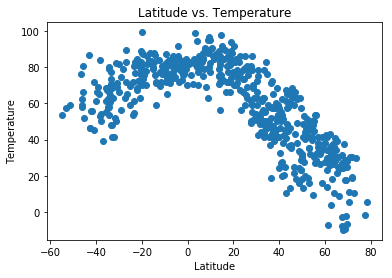

In [27]:
latvstempx = weatherData.loc[:, "Lat"]
latvstempy = weatherData.loc[:, "Max Temp"]

plt.scatter(x = latvstempx, y = latvstempy)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

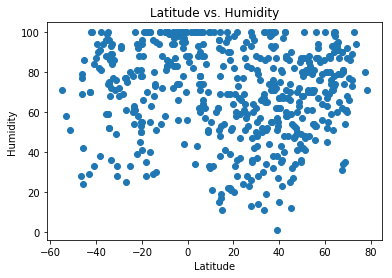

In [28]:
latvshumidityx = weatherData.loc[:, "Lat"]
latvshumidityy = weatherData.loc[:, "Humidity"]

plt.scatter(x = latvshumidityx, y = latvshumidityy)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

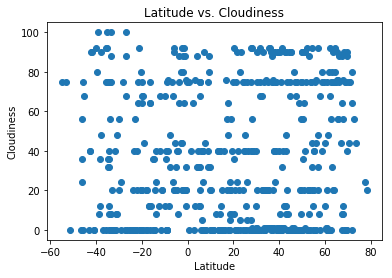

In [29]:
latvscloudinessx = weatherData.loc[:, "Lat"]
latvscloudinessy = weatherData.loc[:, "Cloudiness"]

plt.scatter(x = latvscloudinessx, y = latvscloudinessy)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

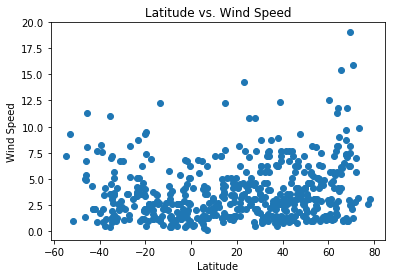

In [30]:
latvswindx = weatherData.loc[:, "Lat"]
latvswindy = weatherData.loc[:, "Wind Speed"]

plt.scatter(x = latvswindx, y = latvswindy)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("LatvsWindSpeed.png")
plt.show()